This notebook will act as a place for WD+WD post processing. Here I will analyze different properties that should be optimized for the simulations

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import useful_fncs 

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
# reading in the HDF5 file
pathToweights_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_NEW_EDIT_1.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

# let's gather the system parameters group 

SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

Let's mak esure we are only looking at the WD+WD from this output

In [4]:
# gather the bool to only select for WD+WD 

WD_WD_bool = useful_fncs.WDWD_bools(SP_WD_data,'Stellar_Type(1)','Stellar_Type(2)')

# masking the data to just look for WD+WD
SP_WDWD_data = SP_WD_data[WD_WD_bool]

In [5]:
SP_WDWD_data

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,5842.090900,0,1.0,5.039797
3,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,3290.631337,0,1.0,0.172821
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,4318.463259,0,1.0,0.216670
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,764.414536,0,1.0,0.228002
8,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,1205.345463,0,1.0,0.206714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,1411.164121,0,1.0,0.273067
99996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,354.066004,0,1.0,0.118433
99997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,587.286296,0,1.0,0.137214
99998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,11942.559794,0,1.0,1.299077


#### Let's look at the mass distiburions

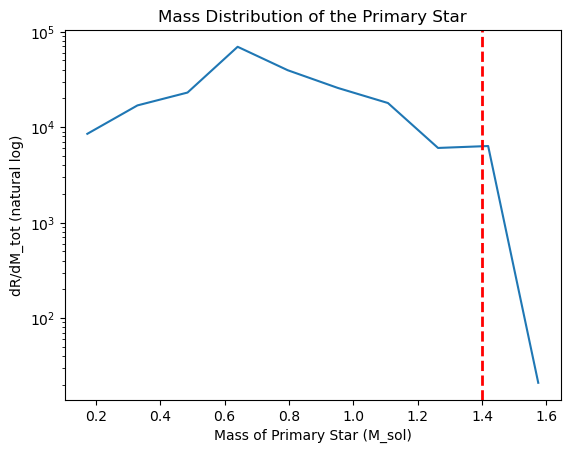

In [8]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_WDWD_data['Mass(1)'], weights=SP_WDWD_data['mixture_weight'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM_tot (natural log)")
plt.title("Mass Distribution of the Primary Star")\

# chandrasekhar limit
chandra_limit = 1.4 

plt.axvline(chandra_limit, color='r', linestyle='--', linewidth=2)
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)